In [53]:
import pandas as pd
import plotly.express as px

In [54]:
df = pd.read_csv('povertydata.csv')

/tmp/ipykernel_25856/16459251.py:1: DtypeWarning:

Columns (66,67,73,79,82,83,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [55]:
df.sample(3)

,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30,is_country
1621,Croatia,HRV,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Special Data Dissemination Standard (SDDS),2011,"World Health Survey, 2003","Income survey (IS), 2015",Yes,"2010. Economic Census, Natural Resources Censu...",1996.0,2017.0,NaN,True
4125,Latvia,LVA,2010,NaN,NaN,NaN,NaN,NaN,35.0,NaN,...,Special Data Dissemination Standard Plus (SDDS+),2011. Population data compiled from administra...,"World Health Survey, 2003","Income survey (IS), 2015",Yes,2010,2013.0,2017.0,NaN,True
3532,Israel,ISR,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Special Data Dissemination Standard (SDDS),2009. Population data compiled from administra...,NaN,"Expenditure survey/budget survey (ES/BS), 2012",Yes,NaN,2014.0,2017.0,NaN,True


In [56]:
df.columns

Index(['Country Name', 'Country Code', 'year',
       'Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)',
       'Annualized growth in per capita real survey mean consumption or income, top 10% (%)',
       'Annualized growth in per capita real survey mean consumption or income, top 60% (%)',
       'Annualized growth in per capita real survey mean consumption or income, total population (%)',
       'Annualized growth in per capita real survey median income or consumption expenditure (%)',
       'GINI index (World Bank estimate)',
       'Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)',
       'Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)',
       'Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)',
       'Income share held by fourth 20%', 'Income share held by highest 10%',
       'Income share held by highest 20%', 'Income share held by lowest 10%',
   

In [57]:
df['Country Code']

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
8282    ZWE
8283    ZWE
8284    ZWE
8285    ZWE
8286    ZWE
Name: Country Code, Length: 8287, dtype: object

In [58]:
fig =px.choropleth(df,
             locations='Country Code',
             color='GINI index (World Bank estimate)',
             animation_frame='year' )
fig.layout.geo.showframe=False
#fig.layout.geo.showframe = False
fig.layout.geo.showcountries = True
fig.layout.geo.projection.type = 'natural earth'
fig.layout.geo.lataxis.range = [-53, 76]
fig.layout.geo.lonaxis.range = [-137, 168]
fig.layout.geo.landcolor = 'white'
fig.layout.geo.bgcolor = '#E5ECF6'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.geo.countrycolor = 'gray'
fig.layout.geo.coastlinecolor = 'gray'
fig.layout.geo.projection.type='azimuthal equal area'

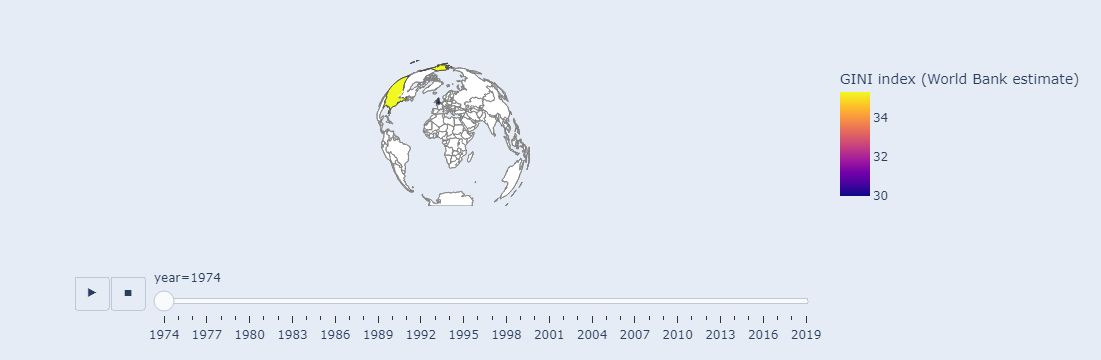

In [59]:
fig.show()

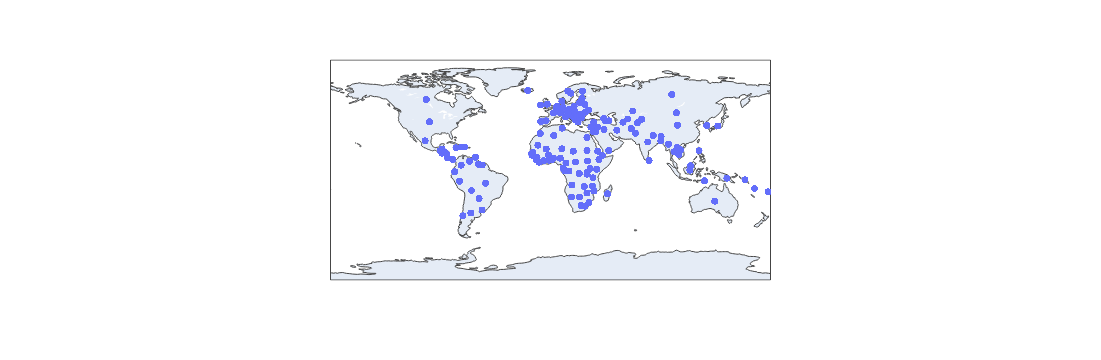

In [26]:
px.scatter_geo(df, locations='Country Code')

In [27]:
lat_long = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')[0]

In [28]:
lat_log = pd.DataFrame(lat_long)

In [29]:
lat_log.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [30]:
type(lat_log)

pandas.core.frame.DataFrame

In [31]:
lat_log.to_csv('lat_long.csv', index=False)

In [32]:
df_lat = pd.read_csv('lat_long.csv')

In [33]:
df_lat

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [34]:
poverty = pd.merge(left=df, right=df_lat, how='left', left_on='2-alpha code', right_on='country')

In [36]:
poverty.head()

,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),...,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30,is_country,country,latitude,longitude,name
0,Afghanistan,AFG,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.0,NaN,True,AF,33.93911,67.709953,Afghanistan
1,Afghanistan,AFG,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.0,NaN,True,AF,33.93911,67.709953,Afghanistan
2,Afghanistan,AFG,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.0,NaN,True,AF,33.93911,67.709953,Afghanistan
3,Afghanistan,AFG,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.0,NaN,True,AF,33.93911,67.709953,Afghanistan
4,Afghanistan,AFG,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017.0,NaN,True,AF,33.93911,67.709953,Afghanistan


In [61]:
df.to_csv('refined_poverty.csv', index=False)

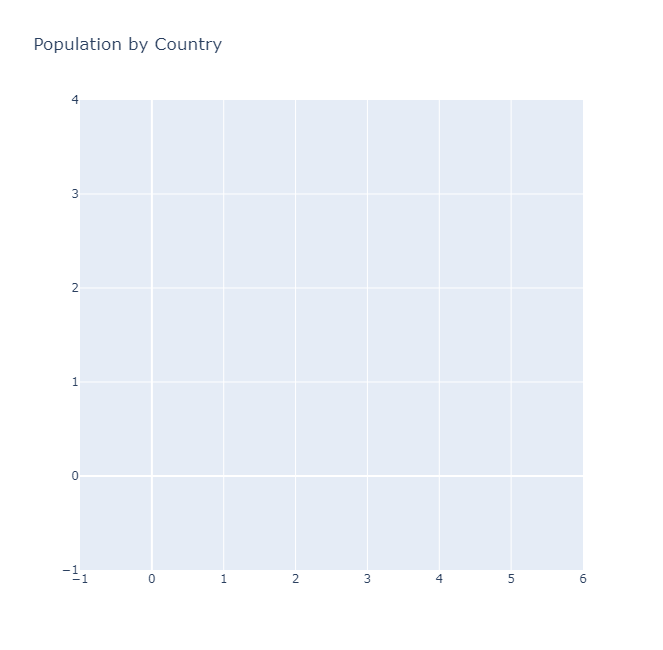

In [45]:
px.scatter_mapbox(df,
                 lon='longitude',
                 lat='latitude',
                 zoom=1,
                 color='Income Group',
                 animation_frame='year',
                 opacity=0.7,
                 height=650,
                 size='Country Name',
                 size_max=80,
                 hover_data=['Income Group', 'Region'],
                 hover_name=df['Country Name'],
                 mapbox_style='stamen-toner',
                 title='Population by Country')